# Exploration 2-1

### Wine Classification

### Table of Contents

1. Problem Definition
2. EDA
    - Missing value check
    - Data Distribution
        - Univariate Variable Visualization
    - Outlier Detection 
    - Data Imbalance
    - Correlation
3. Model Training
4. Model Evaluation & Summary

## 1. 문제 정의 (Problem Definition)
------

#####  sklearn.datasets의 wine 데이터를 사용해 와인의 클래스 0,1,2 를 분류 하는 예측모델구축

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
wine_db= load_wine()

In [6]:
print("와인 데이터 셋의 키: \n{}".format(wine_db.keys()))

와인 데이터 셋의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print(wine_db.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
# 실제 데이터는 data 필드에 저장되어 있음
wine_data = wine_db.data

In [9]:
# target 값은 우리가 예측하려는 와인 종류 클래스 번호(0, 1, 2)를 가지고 있다.
wine_target = wine_db.target

In [10]:
# feature_names 값은 각 특성을 담고 있는 리스트이다.
feature_names = wine_db.feature_names

In [11]:
# wine_df라는 데이터 프레임을 생성한다.
wine_df = pd.DataFrame(wine_data, columns=feature_names)

In [12]:
# 실제 정답 값을 데이터프레임에 저장 
wine_df['label'] = wine_target

In [13]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. 데이터 시각화 (EDA)
------------

1. 결측값 확인 
2. 데이터 분포 확인
    1. countplot
    2. histplot
3. 이상치 탐지
    1. boxplot
4. 데이터 불균형
    1. pieplot
5. 상관관계 확인
    1. heatmap

## 2.1 결측값 확인 (missing value check)
-----------
wine_df.info()를 실행해 정보를 확인했을 때 모두 float64 숫자형 데이터이고, 결측값은 없다

In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [15]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [16]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

## 2.2 데이터 분포 확인

-----
##### 도움 받은 사이트
- [flatuicolors](https://flatuicolors.com/) 사이트에서 다양한 color 태그를 확인할 수 있습니다! 
- [seaborn 사용법 & 다양한 plot 예제](https://analytics4everything.tistory.com/66)


### 2.2.1 Countplot
```
countplot을 통해 와인 클래스의 빈도를 확인할 수 있습니다.
```
[seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

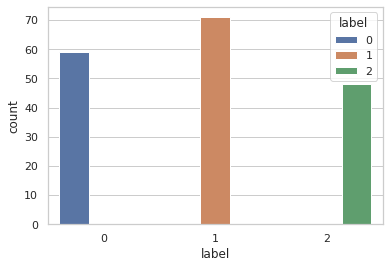

In [23]:
sns.set_theme(style="whitegrid")
sns.countplot(x=wine_df['label'], data=wine_df, hue='label')
plt.show()

## Univariate Variable Visualization (Histogram)
-----

[seaborn histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)


```
히스토그램을 통해 각 변수가 어떤 분포를 가지는지 시각적으로 확인 할 수 있다.
malic_acid, flavanoids와 같은 특성은 정규분포를 따르지 않으며 다른 특성값도 단위가 서로 일정하지 않으므로 스케일링이 요구됩니다
```

In [12]:
color_list = ['#1abc9c','#2ecc71','#3498db','#9b59b6','#34495e',
             '#16a085','#27ae60','#e67e22','#e74c3c','#2c3e50',
              '#f39c12','#c0392b','#95a5a6']

def show_histplot(feature_names, color_list, i, j):
    plt.figure(figsize=(20,20))
    idx = 1
    for feature, color in zip(feature_names, color_list):
        if idx <= (i * j):
            plt.subplot(i, j, idx)
            sns.histplot(wine_df[feature], color=color, kde=True).set_title("{} Interval and Counts".format(feature))
            idx += 1
        else:
            break

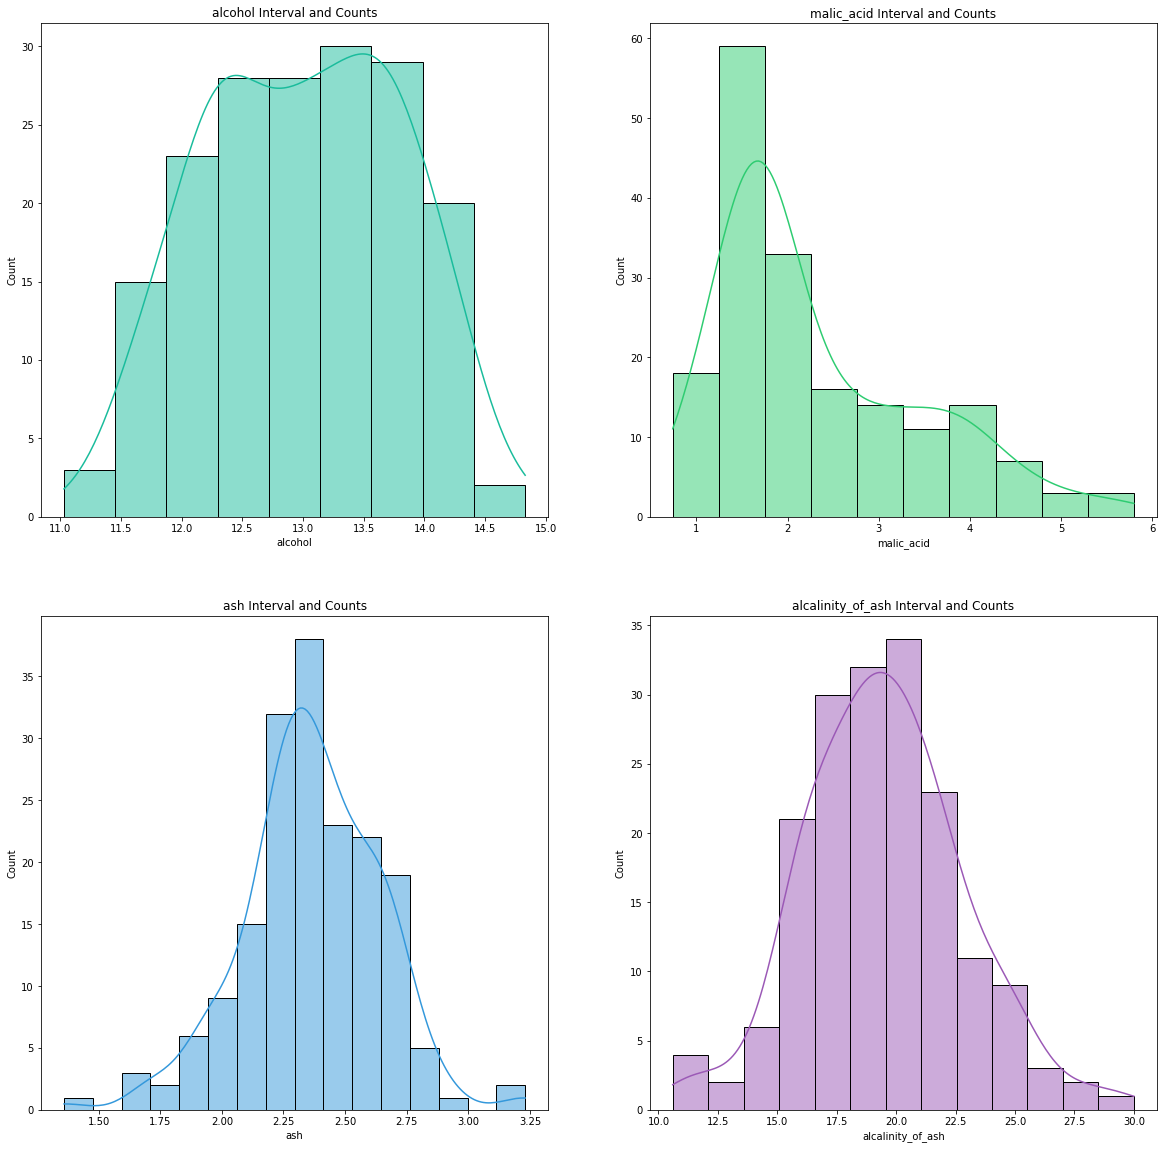

In [13]:
show_histplot(feature_names[:4], color_list[:4],2,2)

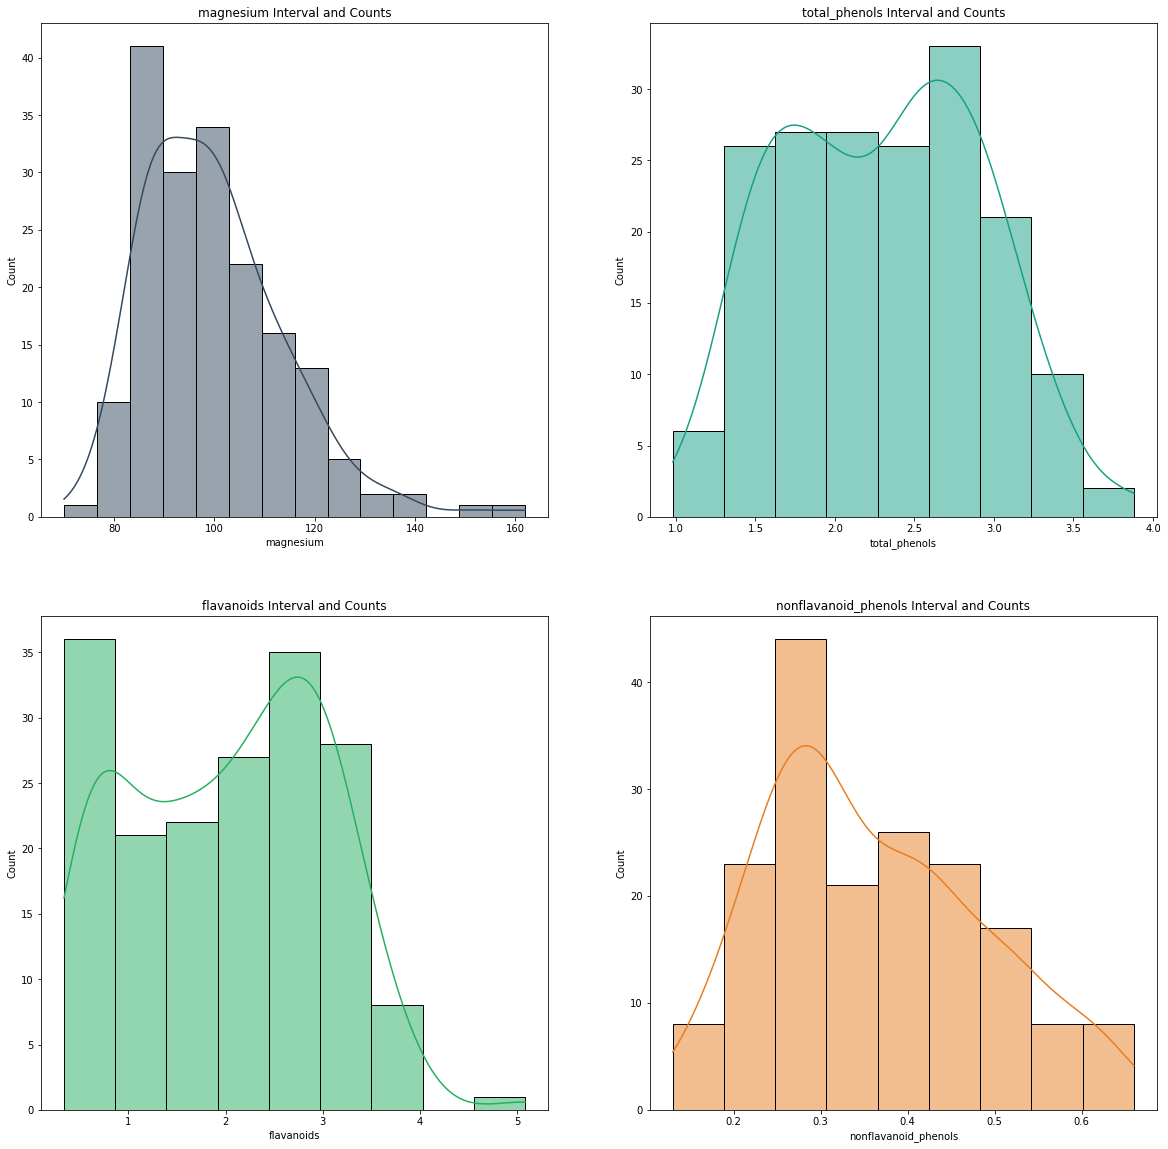

In [14]:
show_histplot(feature_names[4:8], color_list[4:8],2,2)

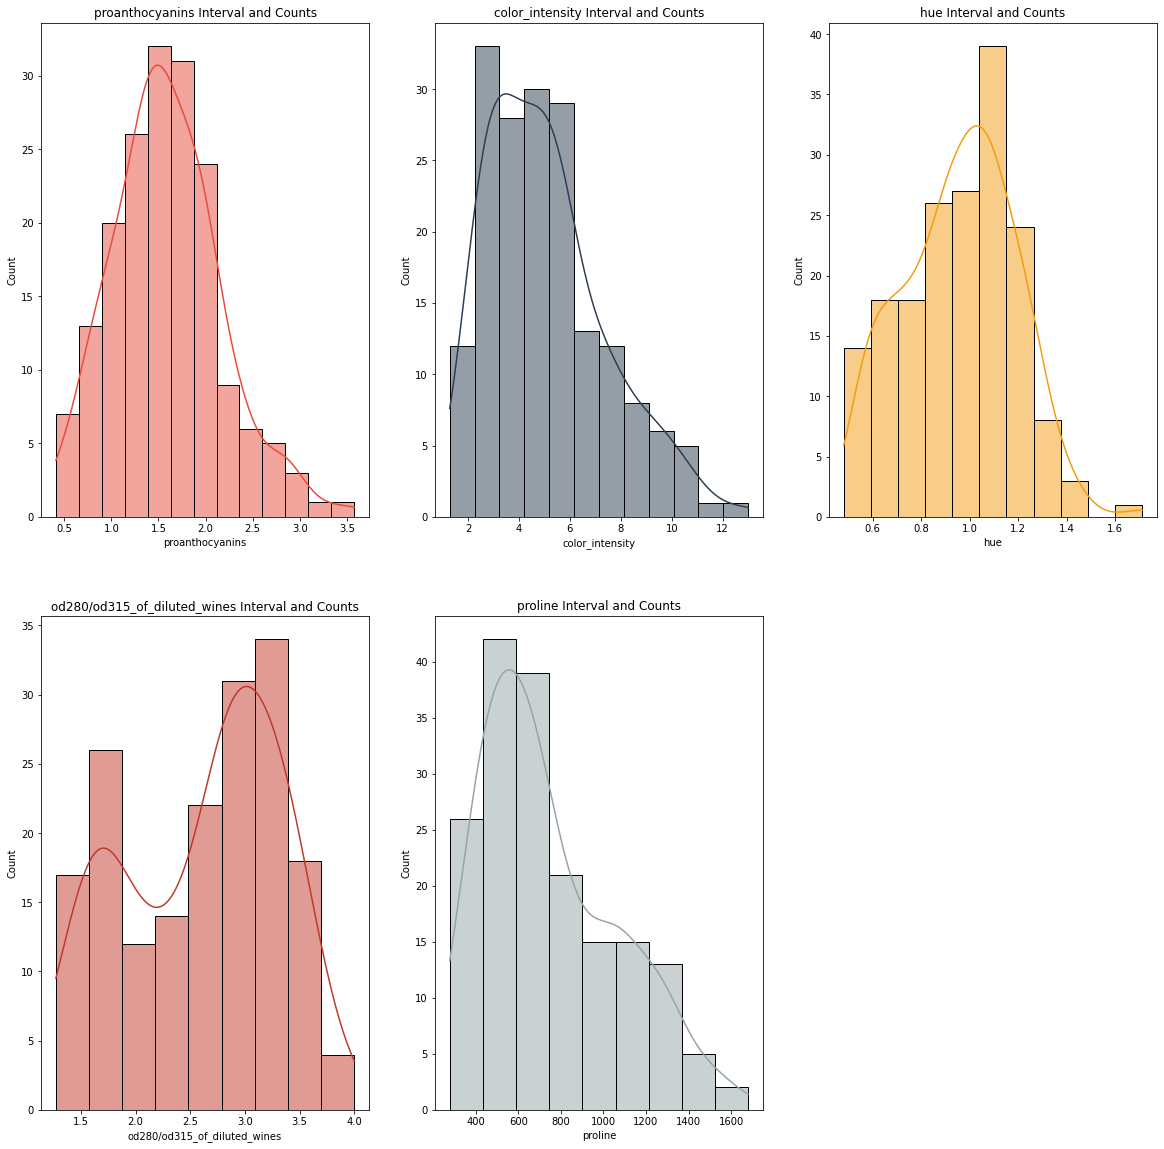

In [15]:
show_histplot(feature_names[8:], color_list[8:],2,3)

### 2.3 이상치 탐지 (Outlier detection)
------------
[seaborn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)

#### boxplot을 사용해 특성값에 존재하는 이상치 존재 여부를 확인 할 수 있다.

'malic_acid',  'ash',  'alcalinity_of_ash',  'magnesium', 'proanthocyanins', 'color_intensity', 

'hue' 등의 특성에서 이상값이 나타나므로 StandardScaler보다는 RobustScaler를 사용하기로 판단했다.

```
1	StandardScaler	기본 스케일. 평균과 표준편차 사용
2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
```

In [25]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

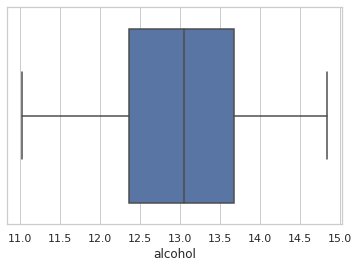

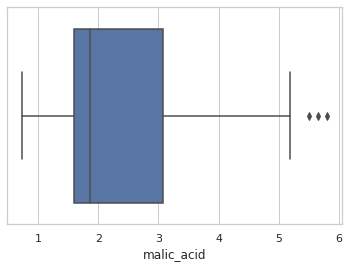

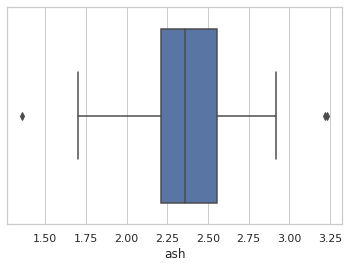

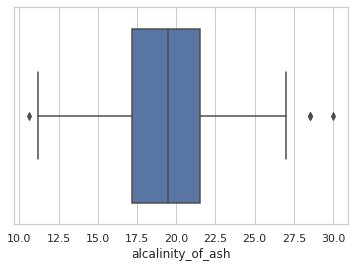

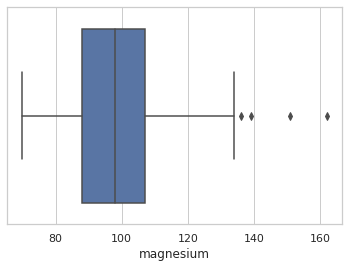

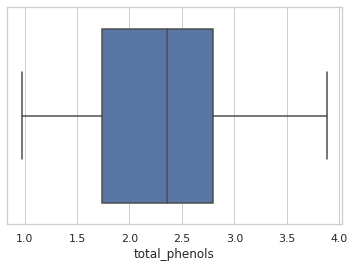

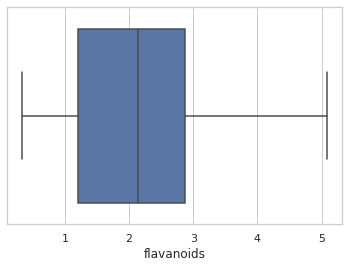

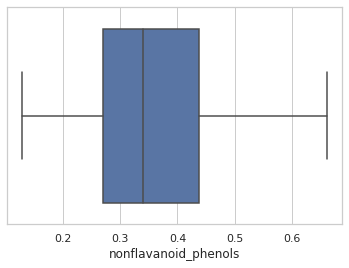

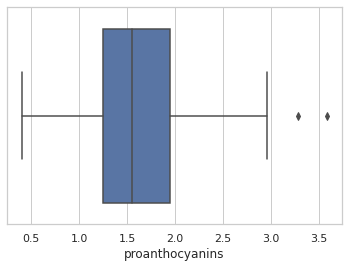

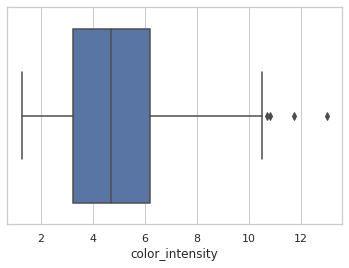

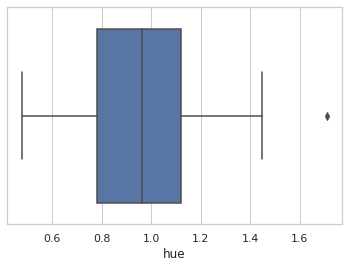

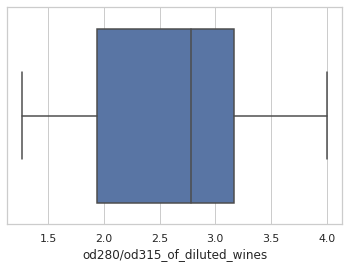

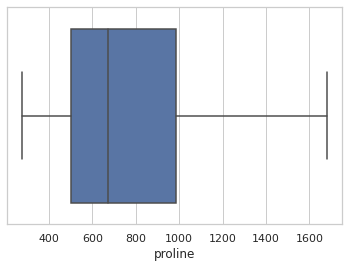

In [24]:
for feature in feature_names:
    sns.boxplot(x = feature, orient = "v", data = wine_df)
    plt.show()

## 2.4 데이터 불균형 (Data Imbalance)

---
[pandas pie plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

#### 와인 클래스 분포가 어떻게 되는가? [countplot을 통해 빈도, pieplot을 통해 비율을 확인할 수 있다]
```
만약 데이터 분포가 balance 하지 않다면 모델을 평가할 때 판단 기준을 다르게 세워야 할 수 있다.
와인 데이터의 클래스 분포는 '0': 33.1%, '1': 39.9%, '2': 27%로 대체적으로 비슷하므로 불균형은 아니기
때문에 accuracy로 모델의 성능을 판단해도 괜찮을 것 같다.
```

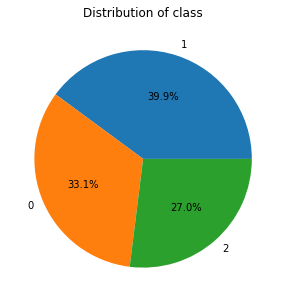

In [17]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of class")
plt.ylabel("class")
wine_df['label'].value_counts().plot.pie(autopct="%1.1f%%").set_ylabel('')

plt.show()

## 2.5 상관 관계 확인 (Correlation)
-------
[seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### 히트맵을 그려서 특성간의 상관 관계가 존재 하는지 알아보자 
```
변수간의 상관관계는 -1 ~ 1 값의 범위를 가지는데 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)이라 하고 변수간의 상관관계가 존재한다면 총 분산에서 설명력(분산)이 높은 몇개의 특성을 선택하여도 데이터를 충분히 설명할 수 있기 때문에 
feature_selection의 필요성이 높아진다.
```

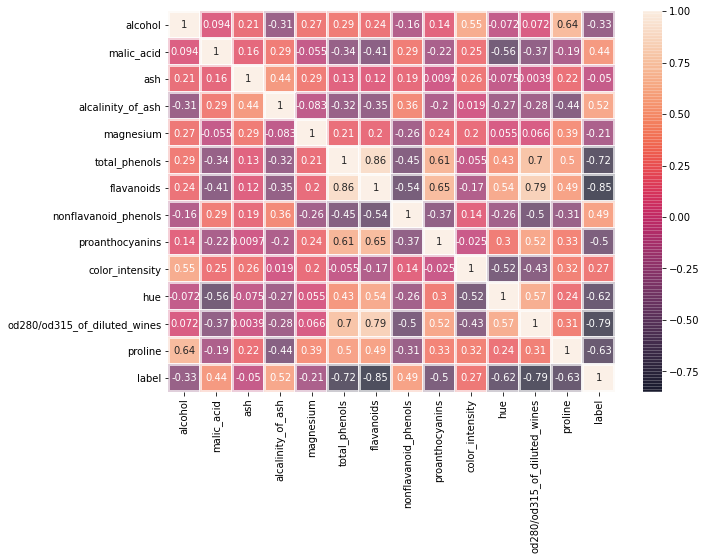

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True, cmap='rocket', alpha=0.7,linewidths = 2)
plt.show()

## 3. 모델 학습 (Model Training)
-------

```
1. 훈련 / 테스트 데이터 준비
2. 1차 파이프라인 (전처리 미적용)
3. 결과 해석
4. 2차 파이프라인 (전처리 적용)
5. 결과해석
```

### 3-1. 훈련 / 테스트 데이터 준비

```
1. 178개의 적은 데이터 셋을 비율을 나눠서 훈련/테스트 세트로 맞춰야한다.
데이터 수가 적기 때문에 accuracy가 높더라도 모델의 일반화 성능을 장담할 수 없다.

2. 적은 데이터를 활용해서 무작정 모델을 평가하기 보다는 K-겹 교차검증 방법과 같이 
샘플의 이용을 극대화하는 방법을 생각해보자!

이 부분에 대해서 개념을 정리해야할 필요성을 느꼈고
노션에 '다양한 모델 평가 방법' 이라는 주제로 글을 작성하였다.

```

https://www.notion.so/modulabs/871bacf4ceb1459dae03b3376cb52435

In [19]:
from sklearn.model_selection import train_test_split

X = wine_df.drop('label', axis=1)
y = wine_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [20]:
print("X_train의 크기: {}".format(X_train.shape))
print("y_train의 크기: {}".format(X_train.shape))

X_train의 크기: (142, 13)
y_train의 크기: (142, 13)


In [21]:
print("X_test의 크기: {}".format(X_test.shape))
print("y_test의 크기: {}".format(y_test.shape))

X_test의 크기: (36, 13)
y_test의 크기: (36,)


## 3.2  1차 파이프라인 (전처리 미적용)
```
5개의 모델을 훈련 및 평가해야 하므로 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스를 사용합니다.
아까 EDA 부분에서 언급했던 것 처럼 Scaling, feature_selection의 필요성을 느꼈기 때문에
모델의 default 성능을 확인 해보고 이후에 Scaling, feature_selection등을 적용한 2차 파이프라인을 사용합니다.
```

In [22]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.svm import SVC as svm
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [23]:
models = {
    'DecisionTree': dt(),
    'RandomForest': rf(),
    'SVM': svm(),
    'SGD': sgd(),
    'Logistic Regression': lr()
}

In [24]:
pipeline_dt = Pipeline([('dt_classifier', dt())])
pipeline_rf = Pipeline([('rf_classifier', rf())])
pipeline_svm = Pipeline([('svm_classifier', svm())])
pipeline_sgd = Pipeline([('sgd_classifier', sgd())])
pipeline_lr = Pipeline([('lr_classifier', lr())])

In [25]:
pipelines = [
    pipeline_dt,
    pipeline_rf,
    pipeline_svm,
    pipeline_sgd,
    pipeline_lr
]

In [26]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
model_list = list(models.keys())
first_test_scores = []

for i, model in enumerate(pipelines):
    score = model.score(X_test, y_test)
    score = int(round(score, 2) * 100)
    first_test_scores.append(score)
    print("{} Test Accuracy: {}%".format(model_list[i], first_test_scores[i]))

DecisionTree Test Accuracy: 94%
RandomForest Test Accuracy: 100%
SVM Test Accuracy: 61%
SGD Test Accuracy: 61%
Logistic Regression Test Accuracy: 97%


#### barplot을 사용하여 모델의 분류 정확도를 %로 시각화하였다.

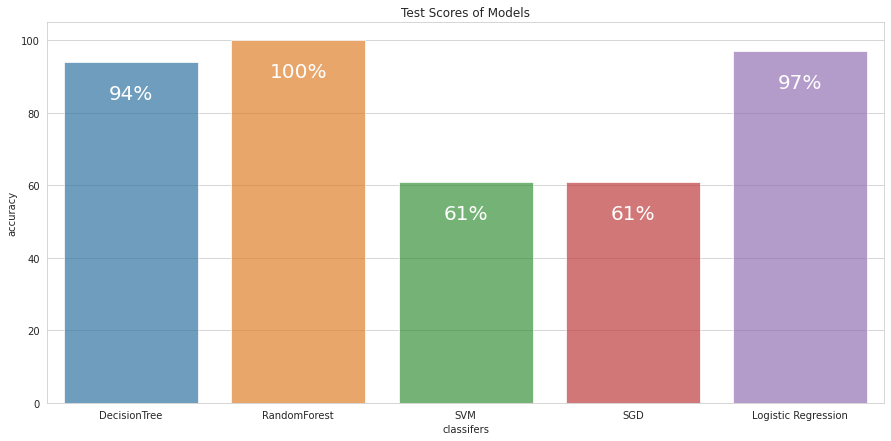

In [28]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Test Scores of Models')

ax1 = sns.barplot(x=model_list, y=first_test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifers')
plt.ylabel('accuracy')
plt.show()

In [29]:
for pipe in pipelines:
    print("---------------------------------------------------------")    
    predictions = pipe.predict(X_test)
    print('classifier : {}\n'.format(pipe[0]))
    print("classification Report: \n{}\n".format(classification_report(predictions, y_test)))

---------------------------------------------------------
classifier : DecisionTreeClassifier()

classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.94      0.97        18
           2       0.83      1.00      0.91        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36


---------------------------------------------------------
classifier : RandomForestClassifier()

classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.3 결과 해석


### SVM과 SGD의 성능이 왜 낮게 나올까?

```
RandomForestClassifier()와 LogisticRegression(), DecisionTreeClassifier()의 경우 성능이 높게 나왔는데  
대용량, 고차원 데이터 분류에는 트리 모델이 안정적으로 높은 성능을 가지기 때문이라 생각합니다.
(텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않습니다.) 
```
```
우선 feature_selection을 통해 모델이 핵심적인 특성값만을 분류하도록 하여 성능 향상을 기대해보고 전체적인 연산량을 
줄일 수 있습니다. 하지만 저차원에서는 선형 모델이 매우 제한적인데, 예를들어 1차 방정식으로 XOR 분류 문제를 해결하지 못하는 것처럼 선형 모델을 유연하게 만드는 방법으로 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 방법도 있습니다.
(feature engineering) 
```
```
이번 분석에서는 SVC와 SGD에 다양한 메소드와 하이퍼파라미터를 추가해서 모델의 성능이 어떻게 변화하는지 확인해봅니다. 
SVC()의 경우 매개변수 설정과 데이터 스케일에 매우 민감하기 때문에 이 분석에서는 RobustScaler을 사용하여 입력 특성의 범위를 줄입니다. 커널 메소드로는‘linear, poly, 'rbf, 'sigmoid,‘precomputed 등이 존재하는데 세부적인 내용에 대한 이해는 어렵지만 linear 커널 메소드를 사용하여 Hyperparameter를 변경해보고 SGD의 경우 learning rate, epoch, penalty 등을 바꿔가면서 변화를 확인합니다.
```

## 3.4  2차 파이프라인 (전처리 적용)
-----

```
1. 전처리
2. Pipeline
    1) DecisionTree
    2) RandomForest
    3) SVM
    4) SGD
    5) LogisiticRegression
3. 시각화
```

## 3.4.1 전처리
------
#### 1. 특성값에 이상값이 존재하기 때문에 RobustScaler를 사용하여 이상값에 Robust한 모형을 구축합니다.
-----
#### 2. 차원 축소를 위해 sklearn.feature_selection의 SelectFromModel를 사용합니다.
[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)


```
feature_selection과 관련하여 다양한 메소드가 있습니다. 
VarianceThreshold, SelectKBest, SelectPercentile,chi2 등이 있으며 자세한 내용은 API 문서를 확인바랍니다.

SelectFromModel

>>> from sklearn.feature_selection import SelectFromModel
>>> from sklearn.linear_model import LogisticRegression
>>> X = [[ 0.87, -1.34,  0.31 ],
...      [-2.79, -0.02, -0.85 ],
...      [-1.34, -0.48, -2.55 ],
...      [ 1.92,  1.48,  0.65 ]]
>>> y = [0, 1, 0, 1]
>>> selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
>>> selector.estimator_.coef_
array([[-0.3252302 ,  0.83462377,  0.49750423]])
>>> selector.threshold_
0.55245...
>>> selector.get_support()
array([False,  True, False])
>>> selector.transform(X)
array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])
```

-------

### 3. KFold Cross Validation
[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

-  cv 매개변수에 정수가 사용될 경우 (cv = k),

- `cross_val_score`(혹은 `cross_validate`) 함수는 모델(회귀/분류)에 따라서 `KFold`와 `StratifiedKFold`를 기본값으로 사용합니다.

```
장점

1. 데이터의 무작위성을 높인다

데이터를 거의 비슷한 사이즈로 k개로 나누고 n={1,2,3, ... , k} 일때  n번째 모델은 n번째 fold를 테스트 세트로 사용하고 
나머지 n-1개의 fold를 훈련 세트로 사용하여 학습합니다. 데이터 각 샘플은 테스트 세트에 정확히 한번씩만 들어가게 되며
k개의 테스트 점수를 평균한 최종 test accuracy를 가질 수 있습니다.

-> 교차 검증의 점수(평균)을 높이기 위해서는 모델의 데이터에 대한 일반화 성능이 중요합니다.

2. 교차 검증을 통해 모델이 훈련 데이터에 얼마나 민감한지 알 수 있다.

교차 검증 점수의 범위가 넓다면 (80% ~ 100%) 모델이 특정 샘플에 얼마나 민감한지 여부를 파악할 수 있습니다.
점수 분포의 분산이 크다면 모델이 일반화 성능이 좋지 않다는 것을 의미합니다.

3. 데이터를 효과적으로 사용할 수 있다

보통 train_test_split 사용해서 훈련,테스트 셋 나누면 75%, 25%로 나눠서 평가를 하는데
5 겹 교차 검증을 이용하면 매 반복에서 모델의 4/5를 학습에 사용한다는 의미이고
10 겹 교차 검증이라면 매 반복에서 9/10을 모델 학습에 사용한다는 의미입니다. 
일반적으로 많은 데이터로 학습한 모델은 좋은 성능을 가집니다.

단점

1) 모델을 한번 학습할 때 보다 k배 만큼 연산 비용이 늘어난다.
2) 만약 정답 레이블이 0,0,0,0,0, 1,1,1,1,1,2,2,2,2,2 순으로 되어있는데 3-겹 교차 검증을 한다면
1번째 폴드는 0이 5개, 2번째 폴드는 1이 5개, 3번째 폴드는 2가 5개만 학습하게 돼서 학습이 안되기 때문에 교차 검증 정확도가 0이 나온다. 그래서 분류 문제에서 교차 검증은 StratifiedKFold가 디폴트로 사용됩니다.
```

In [26]:
second_test_socres = []

---------------------------------
```
모델별로 전처리 단계, GridSearchCV를 이용해 Hyperparameter 튜닝을 진행합니다.
RandomizedSearchCV, GridSearchCV를, HyperOpt(Bayesian Optimization)등 다양한 방법으로 Hyperparameter를 튜닝할 수 있습니다.
```

[RandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html),  [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [HyperOpt(Bayesian Optimization)](https://github.com/hyperopt/hyperopt-sklearn)

###  1. DecisionTree
---
[DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier)

In [31]:
# Decision Tree Pipeline
pipeline_df = Pipeline([('scaler', RobustScaler()),
                        ("feature_selection", SelectFromModel(dt())),
                        ("classification", dt())]
)

# parameters
tree_parameters_tune = [{"classification__criterion": ['gini','entropy'],
                        'classification__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]

# GridSearch 
df_model = GridSearchCV(estimator = pipeline_df,
                     param_grid = tree_parameters_tune,
                     scoring = 'accuracy',
                     cv = 5, # cross validation
                     n_jobs=-1,
                     verbose=1
)
# train model
df_model.fit(X_train, y_train)

# eval model
df_y_pred = df_model.predict(X_test)
score = df_model.score(X_test, y_test)
score = int(round(score, 2) * 100)
second_test_socres.append(score)

print(classification_report(y_test, df_y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.4s finished


In [32]:
#pipeline_df.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'feature_selection', 'classification', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'feature_selection__estimator__ccp_alpha', 'feature_selection__estimator__class_weight', 'feature_selection__estimator__criterion', 'feature_selection__estimator__max_depth', 'feature_selection__estimator__max_features', 'feature_selection__estimator__max_leaf_nodes', 'feature_selection__estimator__min_impurity_decrease', 'feature_selection__estimator__min_impurity_split', 'feature_selection__estimator__min_samples_leaf', 'feature_selection__estimator__min_samples_split', 'feature_selection__estimator__min_weight_fraction_leaf', 'feature_selection__estimator__presort', 'feature_selection__estimator__random_state', 'feature_selection__estimator__splitter', 'feature_selection__estimator', 'feature_selection__max_features', 'feature_selection__norm_order', 'feature_selection__prefit', 'feature_selection__thres

In [ ]:
# cross validation results dict
print(df_model.cv_results_.keys())

In [ ]:
# cv scroes
cv_scores = pd.DataFrame(df_model.cv_results_)
cv_scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score', 'split3_test_score','split4_test_score']]

### 2. RandomForest
---
[RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)

In [33]:
pipeline_rf = Pipeline([('scaler', RobustScaler()),
                        ("feature_selection", SelectFromModel(rf())),
                        ("classification", rf())]
)
# parameters
tree_parameters_tune = [{"classification__criterion": ['gini','entropy'],
                        'classification__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]
# gridSearch 
rf_model = GridSearchCV(estimator = pipeline_rf,
                     param_grid = tree_parameters_tune,
                     scoring = 'accuracy',
                     cv = 5, # cross validation
                     n_jobs=-1,
                     verbose=1
)
# train model
rf_model.fit(X_train, y_train)

# eval model
rf_y_pred = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)
score = int(round(score, 2) * 100)
second_test_scores.append(score)

print(classification_report(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   14.8s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [34]:
pipeline_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'feature_selection', 'classification', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'feature_selection__estimator__bootstrap', 'feature_selection__estimator__ccp_alpha', 'feature_selection__estimator__class_weight', 'feature_selection__estimator__criterion', 'feature_selection__estimator__max_depth', 'feature_selection__estimator__max_features', 'feature_selection__estimator__max_leaf_nodes', 'feature_selection__estimator__max_samples', 'feature_selection__estimator__min_impurity_decrease', 'feature_selection__estimator__min_impurity_split', 'feature_selection__estimator__min_samples_leaf', 'feature_selection__estimator__min_samples_split', 'feature_selection__estimator__min_weight_fraction_leaf', 'feature_selection__estimator__n_estimators', 'feature_selection__estimator__n_jobs', 'feature_selection__estimator__oob_score', 'feature_selection__estimator__random_state', 'feature_selection__

### 3. SVM(kernel='linear')
----
[Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

In [35]:
pipeline_svm = Pipeline([('scaler',RobustScaler()),
                         ("feature_selection", SelectFromModel(svm(kernel='linear'))),
                         ("classification", svm(kernel="linear"))]
)

# parameters
svm_parameters_tune = [{"classification__C": [0.01, 0.1, 1.0, 10.0, 100.0, 1000], }]

# optimization 
svm_model = GridSearchCV(estimator = pipeline_svm,
                     param_grid = svm_parameters_tune,
                     scoring = 'accuracy',
                     cv = 5, # cross validation
                     n_jobs=-1,
                     verbose=1
                    )
# train model
svm_model.fit(X_train, y_train)

# eval model
svm_y_pred = svm_model.predict(X_test)
score = svm_model.score(X_test, y_test)
score = int(round(score, 2) * 100)
second_test_scores.append(score)

print(classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [36]:
pipeline_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'feature_selection', 'classification', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'feature_selection__estimator__C', 'feature_selection__estimator__break_ties', 'feature_selection__estimator__cache_size', 'feature_selection__estimator__class_weight', 'feature_selection__estimator__coef0', 'feature_selection__estimator__decision_function_shape', 'feature_selection__estimator__degree', 'feature_selection__estimator__gamma', 'feature_selection__estimator__kernel', 'feature_selection__estimator__max_iter', 'feature_selection__estimator__probability', 'feature_selection__estimator__random_state', 'feature_selection__estimator__shrinking', 'feature_selection__estimator__tol', 'feature_selection__estimator__verbose', 'feature_selection__estimator', 'feature_selection__max_features', 'feature_selection__norm_order', 'feature_selection__prefit', 'feature_selection__threshold', 'classification__C'

### 4. SGD
[Stochastic Gradient Descen](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier)

------
```
데이터가 충분히 많은 경우 경우 훨씬 짧은 시간에 유사한 결과를 생성하기 위해 
Logistic Classifier 대신 SGD Classifier를 구현하는 것이 좋습니다.
```
[How to make SGD Classifier perform as well as Logistic Regression using parfit](https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4)



In [37]:
pipeline_sgd = Pipeline(
    [   ('scaler', RobustScaler()),
        ("feature_selection", SelectFromModel(sgd())),
        ("classification", sgd()),
    ]
)
# parameters
sgd_parameters_tune = [{"classification__alpha" : [0.0001, 0.001, 0.01,0.1,1, 1, 10, 100, 1000],
                        'classification__n_iter_no_change' : [1000],
                        'classification__loss' : ['log'],
                        'classification__penalty' : ['l2']
                       }]

# optimization
sgd_model = GridSearchCV(estimator = pipeline_sgd,
                     param_grid = sgd_parameters_tune,
                     scoring = 'accuracy',
                     cv = 5, # cross validation
                     n_jobs=-1,
                     verbose=1
                    )
# train model
sgd_model.fit(X_train, y_train)

# eval model
sgd_y_pred = sgd_model.predict(X_test)
score = sgd_model.score(X_test, y_test)
score = int(round(score, 2) * 100)
second_test_scores.append(score)

print(classification_report(y_test, sgd_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [38]:
pipeline_sgd.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'feature_selection', 'classification', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'feature_selection__estimator__alpha', 'feature_selection__estimator__average', 'feature_selection__estimator__class_weight', 'feature_selection__estimator__early_stopping', 'feature_selection__estimator__epsilon', 'feature_selection__estimator__eta0', 'feature_selection__estimator__fit_intercept', 'feature_selection__estimator__l1_ratio', 'feature_selection__estimator__learning_rate', 'feature_selection__estimator__loss', 'feature_selection__estimator__max_iter', 'feature_selection__estimator__n_iter_no_change', 'feature_selection__estimator__n_jobs', 'feature_selection__estimator__penalty', 'feature_selection__estimator__power_t', 'feature_selection__estimator__random_state', 'feature_selection__estimator__shuffle', 'feature_selection__estimator__tol', 'feature_selection__estimator__validation_fraction', 

### 5. Logisitc Regression
---
[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression)

In [39]:
pipeline_lr = Pipeline(
    [   ('scaler', RobustScaler()),
        ("feature_selection", SelectFromModel(lr())),
        ("classification", lr()),
    ]
)
# parameters
lr_parameters_tune = [{"classification__C" : [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 10, 100, 1000],
                        'classification__penalty' : ['l2']
                       }]
# optimization 
lr_model = GridSearchCV(estimator = pipeline_lr,
                     param_grid = lr_parameters_tune,
                     scoring = 'accuracy',
                     cv = 5, # cross validation
                     n_jobs=-1,
                     verbose=1
                    )
# train model
lr_model.fit(X_train, y_train)

# eval model
lr_y_pred = lr_model.predict(X_test)
score = lr_model.score(X_test, y_test)
score = int(round(score, 2) * 100)
second_test_scores.append(score)

print(classification_report(y_test, lr_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.4s finished


In [40]:
pipeline_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'feature_selection', 'classification', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'feature_selection__estimator__C', 'feature_selection__estimator__class_weight', 'feature_selection__estimator__dual', 'feature_selection__estimator__fit_intercept', 'feature_selection__estimator__intercept_scaling', 'feature_selection__estimator__l1_ratio', 'feature_selection__estimator__max_iter', 'feature_selection__estimator__multi_class', 'feature_selection__estimator__n_jobs', 'feature_selection__estimator__penalty', 'feature_selection__estimator__random_state', 'feature_selection__estimator__solver', 'feature_selection__estimator__tol', 'feature_selection__estimator__verbose', 'feature_selection__estimator__warm_start', 'feature_selection__estimator', 'feature_selection__max_features', 'feature_selection__norm_order', 'feature_selection__prefit', 'feature_selection__threshold', 'classification__C', '

In [41]:
model_list

['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'Logistic Regression']

In [42]:
model_list = list(models.keys())

for i in range(len(model_list)):
    print("{} Test Accuracy: {}%".format(model_list[i], second_test_scores[i]))

DecisionTree Test Accuracy: 97%
RandomForest Test Accuracy: 100%
SVM Test Accuracy: 100%
SGD Test Accuracy: 94%
Logistic Regression Test Accuracy: 100%


### 3.3 시각화

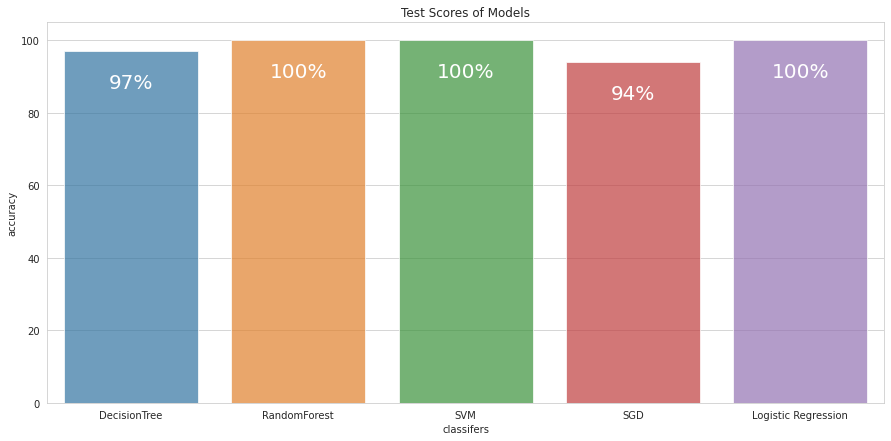

In [43]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.title('Test Scores of Models')

ax1 = sns.barplot(x=model_list, y=second_test_scores, alpha=0.7)
for p in ax1.patches:
    ax1.annotate(f'\n{int(p.get_height())}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=20)
    
plt.xlabel('classifIers')
plt.ylabel('accuracy')
plt.show()

## 4. 모델 평가 및 요약 (Model Evaluation & Summary)

```
1. 데이터 시각화를 통해 스케일링의 필요성, 이상치 존재, 상관관계가 있는 특성들을 제거할 필요성을 느꼈다
2. 단순히 Wine의 클래스를 분류하는 문제이기 때문에 Accuracy를 통해 모델의 성능을 평가해도 괜찮다고 판단하였다
3. RobustScaler, SelectBestModel를 파이프라인에 연결하고 GridSearchCV를 사용하여 다양한 파라미터를 모델에 
적용해 데이터에 잘 fitting 되는 최적의 모형을 선택할 수 있었고 5겹 교차 검증으로 모델의 일반화 성능을 개선하였다. 
4. 전처리와 최적화를 통해 1차 시도에서 성능 이슈가 있었던 SGD, SVM의 성능을 유의미하게 개선할 수 있었다.
```

In [46]:
results = {'Pipeline_1': first_test_scores , 'Pipeline_2': second_test_scores}

results_df = pd.DataFrame(results, index=model_list)
results_df

,Pipeline_1,Pipeline_2
DecisionTree,94,97
RandomForest,100,100
SVM,61,100
SGD,61,94
Logistic Regression,97,100


이번 노드를 해결하면서 머신러닝의 세계에 첫 발을 내딛은 것 같아 많이 뿌듯했다. 단지 % 를 높이기 위해 최적화 하는 작업이 매력적이고
보람있었다는 느낌보다는 간단한 머신러닝 문제일지라도 어떻게 문제를 접근하는지에 따라 결과가 유의미하게 달라질 수 있다는 사실을
알게 되었고 앞으로는 보다 복잡한 데이터를 많이 만나게 될 탠데 어려운 문제를 해결하기 위해서 가장 필요한 것은 기본기와 경험이라고
생각한다. 분석을 하면서 아무래도 kaggle을 많이 참고하게 되는데 세상에 고수는 엄청나게 많고 나는 아직 모르는거 투성이라는 사실이다.
많이 따라하고 따라해야겠다.